In [1]:
import pandas as pd

In [2]:
x=pd.read_csv("data.csv")

In [3]:
x

,No,Place,Sign,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      74682 non-null  int64 
 1   Place   74682 non-null  object
 2   Sign    74682 non-null  object
 3   Text    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
x.describe()

,No
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
x.shape

(74682, 4)

In [7]:
x.columns

Index(['No', 'Place', 'Sign', 'Text'], dtype='object')

In [8]:
x.isnull().sum()

No         0
Place      0
Sign       0
Text     686
dtype: int64

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

x['Text'] = x['Text'].astype(str).fillna('')

# Function to get sentiment
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the specified column
x['sentiment'] = x['Text'].apply(get_sentiment)

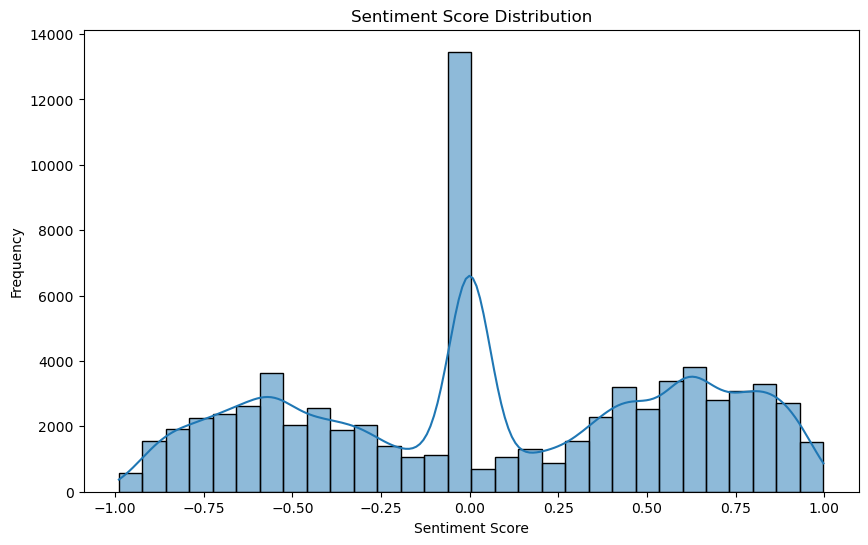

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(x['sentiment'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

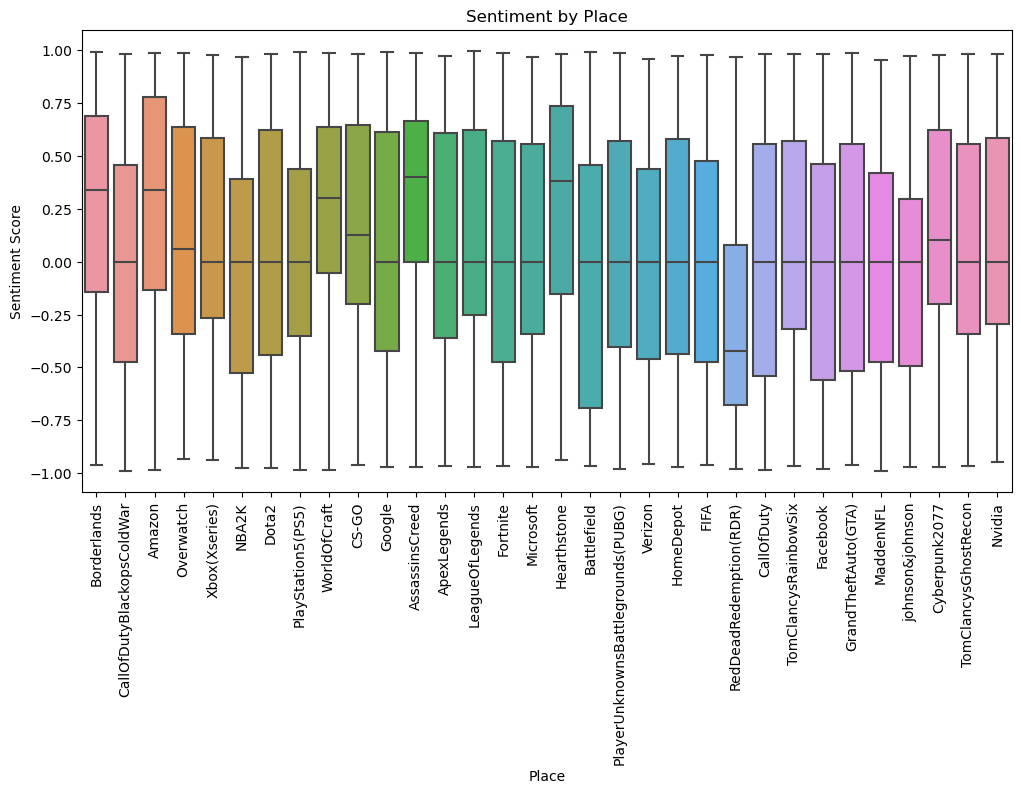

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place', y='sentiment', data=x)
plt.title('Sentiment by Place')
plt.xlabel('Place')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Score')
plt.show()